# 1. Import libraries and pre-process data

**1.1. Import liabraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import PolynomialFeatures
import scipy.optimize as opt
import random
import warnings

**1.2. Import data**

The data describes the chance of microchip's acceptance after two test

In [ ]:
df = pd.read_csv ('https://raw.githubusercontent.com/Nikronic/Coursera-Machine-Learning/master/Week%203%20-%20Logistic%20Regression/ex2data2.csv', names = ['Test #1', 'Test #2', 'Accepted'])
df.head ()

,Test #1,Test #2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [ ]:
# Split data X & y
X = df.iloc [:, :2].values
y = df.iloc [:, -1].values
m, n = X.shape
print (f'{m} training samples, {n} features \n')

# Show the first five X & y
for i in range (5):
    print ('X =', X[i ], ', y =', y[i])

118 training samples, 2 features 

X = [0.051267 0.69956 ] , y = 1
X = [-0.092742  0.68494 ] , y = 1
X = [-0.21371  0.69225] , y = 1
X = [-0.375    0.50219] , y = 1
X = [-0.51325  0.46564] , y = 1


# 2. Plot data 

**2.1. 3D Scatter**

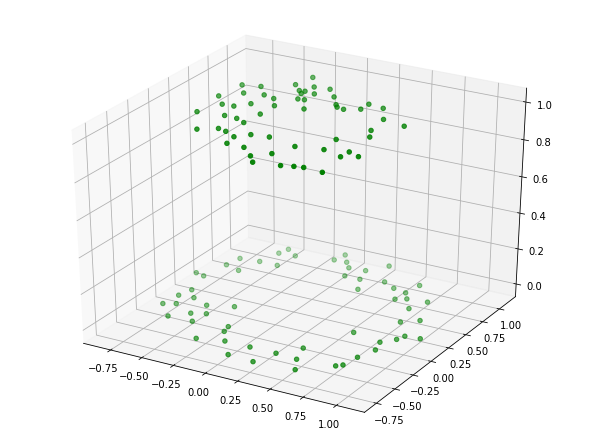

In [ ]:
fig = plt.figure (figsize = (8, 6))
ax = Axes3D (fig)

ax.scatter (X[:,0], X[:,1], y, c = 'g')
plt.show ()

*2.2. 2D Scatter*

In [ ]:
df_accepted = df[df['Accepted'] == 1]
df_notaccepted = df[df['Accepted'] == 0]

df_accepted.iloc [:, 1].head ()


0    0.69956
1    0.68494
2    0.69225
3    0.50219
4    0.46564
Name: Test #2, dtype: float64

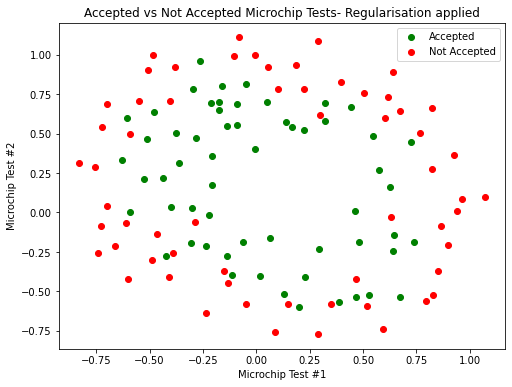

In [ ]:
plt.figure (figsize = (8, 6))
plt.scatter (df_accepted.iloc [:, 0], df_accepted.iloc [:, 1], c = 'g',  label = 'Accepted')
plt.scatter (df_notaccepted.iloc [:, 0], df_notaccepted.iloc [:, 1], c = 'r', label = 'Not Accepted')

plt.title ('Accepted vs Not Accepted Microchip Tests- Regularisation applied')
plt.xlabel ('Microchip Test #1')
plt.ylabel ('Microchip Test #2')
plt.legend ()
plt.show ()

# 3. Features Mapping

In [ ]:
# Using sklearn module with Polyminal Features 
# We also need to include bias (insert first column with bias value of '1') -> include_bias = True

pf = PolynomialFeatures (degree= 6, include_bias= True)
x_poly = pf.fit_transform (X)
pd.DataFrame (x_poly).head ()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,1.0,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,0.025089,0.342354,0.000007,0.000094,0.001286,0.017551,0.239497,3.541519e-07,0.000005,0.000066,0.000900,0.012278,0.167542,1.815630e-08,2.477505e-07,0.000003,0.000046,0.000629,0.008589,0.117206
1,1.0,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,-0.043509,0.321335,0.000074,-0.000546,0.004035,-0.029801,0.220095,-6.860919e-06,0.000051,-0.000374,0.002764,-0.020412,0.150752,6.362953e-07,-4.699318e-06,0.000035,-0.000256,0.001893,-0.013981,0.103256
2,1.0,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,0.031616,-0.102412,0.331733,0.002086,-0.006757,0.021886,-0.070895,0.229642,-4.457837e-04,0.001444,-0.004677,0.015151,-0.049077,0.158970,9.526844e-05,-3.085938e-04,0.001000,-0.003238,0.010488,-0.033973,0.110047
3,1.0,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,0.070620,-0.094573,0.126650,0.019775,-0.026483,0.035465,-0.047494,0.063602,-7.415771e-03,0.009931,-0.013299,0.017810,-0.023851,0.031940,2.780914e-03,-3.724126e-03,0.004987,-0.006679,0.008944,-0.011978,0.016040
4,1.0,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,0.122661,-0.111283,0.100960,0.069393,-0.062956,0.057116,-0.051818,0.047011,-3.561597e-02,0.032312,-0.029315,0.026596,-0.024128,0.021890,1.827990e-02,-1.658422e-02,0.015046,-0.013650,0.012384,-0.011235,0.010193


# 4. Add functions for compuatation

In [ ]:
m, n = x_poly.shape 

# Define theta[0]
initial_theta = np.zeros (n)

# Define hyperparameter 
lambda_ = 1

# reshape y (-1, 1)
# y = y.reshape (-1, 1)

In [ ]:
# Sigmoid function

def sigmoid (z):
    g = 1/ (1 + np.exp (-z))
    return g

In [ ]:
def lr_hypothesis (x,theta):
    return np.dot(x,theta)

In [ ]:
# Cost function

def cost_function (theta, x, y, lambda_):
    m, n = x.shape
    hx = sigmoid (x.dot (theta))
    
    J =  1.0 / m * (np.sum( -y.T.dot(np.log(hx)) - (1 - y.T).dot(np.log(1 - hx)) )) + (lambda_ * np.sum(theta [1:]**2)/ (2.0 *m))
    return J


In [ ]:
# Gradient function

def gradient_function (theta, x, y, lambda_):
    m, n = x.shape
    hx = sigmoid (x.dot (theta))
    
    # Initial theta set to zeros
    initial_theta = np.zeros (n)
    # Set theta[0] = 0, theta [1:] = 1
    # theta = np.concatenate (([0], np.ones(len(initial_theta) - 1)))

    # Initial gradient set to zeros
    gradient = np.zeros (np.shape (theta))
    # gradient = ((hx - y).T.dot(x) / m).T + (np.dot(lambda_, theta)).dot(initial_theta)/ m

    err = sigmoid (x.dot(theta)) - y
    gradient [0] = (1/m) * (x[:,0].T@err)
    gradient [1:] = (1/m) * (x[:,1:].T@err) + (lambda_/m) * theta[1:]
    return gradient


In [ ]:
# Test cost function
test_lambda_ = 1
test_theta = np.zeros (n)
cost_temp = cost_function (test_theta, x_poly, y, test_lambda_)
gradient_temp = gradient_function (test_theta, x_poly, y, test_lambda_)

print (f'For lambda = {test_lambda_}, theta = 0 \n =====> Cost =', cost_temp.round(4), '\n =====> Gradient[:5] =', gradient_temp[:5].round(4))


For lambda = 1, theta = 0 
 =====> Cost = 0.6931 
 =====> Gradient[:5] = [0.0085 0.0188 0.0001 0.0503 0.0115]


In [ ]:
test_lambda_ = 10
test_theta = np.ones (n)

cost_temp = cost_function (test_theta, x_poly, y, test_lambda_)
gradient_temp = gradient_function (test_theta, x_poly, y, test_lambda_)

print (f'For lambda = {test_lambda_}, theta  = 1 \n =====> Cost =', cost_temp.round(4), '\n =====> Gradient[:5] =', gradient_temp[:5].round(4))


For lambda = 10, theta  = 1 
 =====> Cost = 3.1645 
 =====> Gradient[:5] = [0.346  0.1614 0.1948 0.2269 0.0922]


In [ ]:
''' 
Insert function for prediction
if sigmoid (x_dot_theta) <= 0.5 -> y = 0
else sigmoid (x_dot_theta) > 0.5 -> y = 1
''' 

def predict (theta, X):
    p = sigmoid (X.dot(theta)) >= 0.5
    return p.astype (int)

# 5. Comparison among Lambda, Cost value and its accuracy rate

In [ ]:
lambda_list = np.arange (0, 100, 1)
costs = []
accuracy = []
initial_theta = np.zeros (n)

for lambda_ in lambda_list:
    theta, nfeval, rc = opt.fmin_tnc(func = cost_function, fprime = gradient_function, x0 = initial_theta, args = (x_poly, y, lambda_))
    cost = cost_function (theta, x_poly, y, lambda_).round (4)
    costs.append (cost)
    p = predict (theta, x_poly)
    acc = (np.mean (p == y) * 100)
    accuracy.append (acc)

df1 = pd.DataFrame (list(zip (lambda_list, costs, accuracy)), columns= ['lambda', 'cost_value', 'accuracy'], index = None )
df1.head ()

,lambda,cost_value,accuracy
0,0,0.2578,86.440678
1,1,0.5290,83.050847
2,2,0.5734,83.050847
3,3,0.5966,80.508475
4,4,0.6114,80.508475


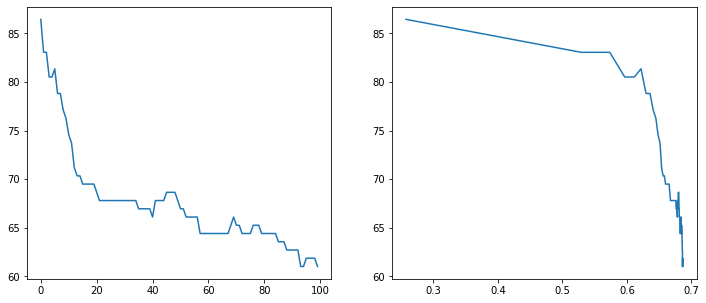

In [ ]:
# Plot a comparison among Lambda, Cost value vs Accuracy rate
x1 = df1['lambda']
x2 = df1['cost_value']
y1 = df1['accuracy']
fig, axes = plt.subplots (nrows = 1, ncols = 2, figsize = (12, 5))
axes[0].plot(x1, y1)
axes[1].plot(x2, y1)
warnings.filterwarnings ('ignore')

 # 6. Plot Boundary Decision and Evaluate Lambda

**λ = 1**

In [ ]:
# Using advanced opimisation to find theta

def find_optimal (X, y, lambda_):

    initial_theta = np.zeros (n)

    theta_opt, nfeval, rc = opt.fmin_tnc(func = cost_function, fprime = gradient_function, x0 = initial_theta, args = (X, y, lambda_))

    cost_opt = cost_function (theta_opt, X, y, lambda_)
    return theta_opt, cost_opt
    

In [ ]:
theta_opt, cost_opt = find_optimal (x_poly, y, lambda_ = 1)
print ('Cost at theta found by fminunc:', cost_opt.round (4))
print ('theta:', theta_opt.round (4))

Cost at theta found by fminunc: 0.529
theta: [ 1.2727  0.6253  1.1811 -2.0199 -0.9174 -1.4317  0.1239 -0.3655 -0.3573
 -0.1752 -1.4582 -0.051  -0.6156 -0.2747 -1.1927 -0.2422 -0.206  -0.0447
 -0.2778 -0.2954 -0.4565 -1.0432  0.0278 -0.2924  0.0156 -0.3274 -0.1439
 -0.9247]


In [ ]:
pf = PolynomialFeatures (degree= 6, include_bias= True)

u = np.linspace (-1, 1.5, 50)
v = np.linspace (-1, 1.5, 50)
z = np.zeros ((len(u), len(v)))
u = u.reshape (-1, 1)
v = v.reshape (-1, 1)
def find_z (theta):
    for i in range (0, len(u)):
        for j in range (0, len(v)):
            a = np.array([u[i], v[j]]).reshape (1, -1)
            z[i, j] = np.dot (pf.fit_transform(a), theta)
    return z
z = find_z (theta_opt)

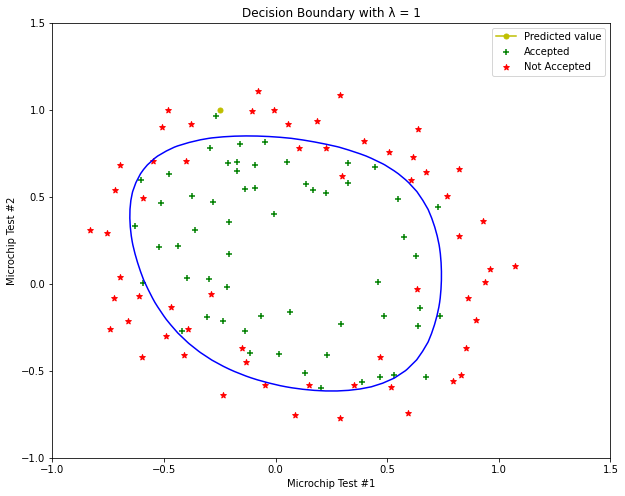

In [ ]:
plt.figure (figsize = (10, 8))
plt.scatter (df_accepted.iloc [:, 0], df_accepted.iloc [:, 1], c = 'g',marker = '+',  label = 'Accepted')
plt.scatter (df_notaccepted.iloc [:, 0], df_notaccepted.iloc [:, 1], c = 'r',marker = '*', label = 'Not Accepted')

xy, yx = np.meshgrid (u, v)
CS = plt.contour (xy, yx, z.T, levels = [0], colors = 'b')
plt.title ('Decision Boundary with λ = 1')
plt.xlabel ('Microchip Test #1')
plt.ylabel ('Microchip Test #2')
plt.plot ([-.25], [1], marker = 'o', markersize = 5, c = 'y', label = 'Predicted value')
plt.legend ()
plt.show ()

In [ ]:
# Measure accuracy
p = predict (theta_opt, x_poly)
print ('Accuracy:', (np.mean (p == y) *100).round(2), '%')

Accuracy: 83.05 %


In [ ]:
# For X = [-0.25, 1.5] -> y = 1 -> this seems to be not a correct decision 
pf = PolynomialFeatures (degree= 6, include_bias = True)
X = np.array([-0.25, 1.5]).reshape (1, -1)
X = pf.fit_transform (X)
predict (theta_opt, X)

array([0])

**λ = 0**

In [ ]:
# Find optimal theta
theta_opt, cost_opt = find_optimal (x_poly, y, lambda_ = 0)
print ('Optimal cost =', cost_opt.round (4))
print ('Optimal theta =', theta_opt)

Optimal cost = 0.2578
Optimal theta = [ 1.01179563e+01  1.14696654e+01  7.97370050e+00 -1.10582098e+02
 -6.83289436e+01 -2.73354137e+01 -1.06111752e+02 -1.09487924e+02
 -2.61221678e+01  3.69692048e-01  4.21375015e+02  4.39449431e+02
  4.02339150e+02  1.81935281e+02  1.30596664e+01  2.10579293e+02
  3.66247839e+02  3.42045669e+02  1.42743203e+02 -1.47939981e+01
 -5.05989206e+00 -5.16124541e+02 -7.72124744e+02 -9.37499400e+02
 -7.03287187e+02 -4.56075320e+02 -1.45274398e+02 -5.65836191e+00]


In [ ]:
# Find z to plot contour
z = find_z (theta_opt)


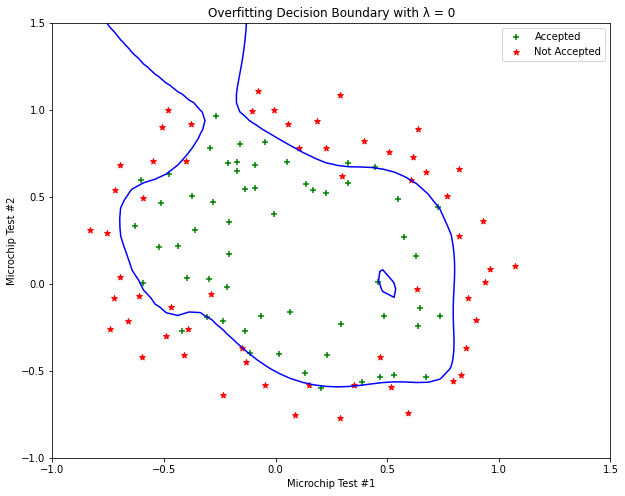

In [ ]:
plt.figure (figsize = (10, 8))
plt.scatter (df_accepted.iloc [:, 0], df_accepted.iloc [:, 1], c = 'g',marker = '+',  label = 'Accepted')
plt.scatter (df_notaccepted.iloc [:, 0], df_notaccepted.iloc [:, 1], c = 'r',marker = '*', label = 'Not Accepted')

xy, yx = np.meshgrid (u, v)
CS = plt.contour (xy, yx, z.T, levels = [0], colors = 'b')
plt.title ('Overfitting Decision Boundary with λ = 0')
plt.xlabel ('Microchip Test #1')
plt.ylabel ('Microchip Test #2')
plt.legend ()
plt.show ()

In [ ]:
# Measure accuracy
p = predict (theta_opt, x_poly)
print ('Accuracy:', (np.mean (p == y) *100).round(2), '%')

Accuracy: 86.44 %


Note: With lambda = 0 (No regularisation applied), that seems to be overfitted with 86.44% accuracy rate.

**λ = 100**


In [ ]:
# Find optimal theta
theta_opt, cost_opt = find_optimal (x_poly, y, lambda_ = 100)
print ('Optimal cost =', cost_opt.round (4))
print ('Optimal theta =', theta_opt)

Optimal cost = 0.6865
Optimal theta = [ 0.02187847 -0.0174817   0.00571065 -0.05516901 -0.01314874 -0.03859873
 -0.01846356 -0.00773219 -0.00892429 -0.02280461 -0.04343846 -0.00235623
 -0.01415612 -0.00349507 -0.04143595 -0.02100593 -0.00471917 -0.00359131
 -0.00632226 -0.0050244  -0.03197683 -0.03416334 -0.00107629 -0.00702615
 -0.00038507 -0.0079823  -0.00154779 -0.04108683]


In [ ]:
# Find z to plot contour
z = find_z (theta_opt)

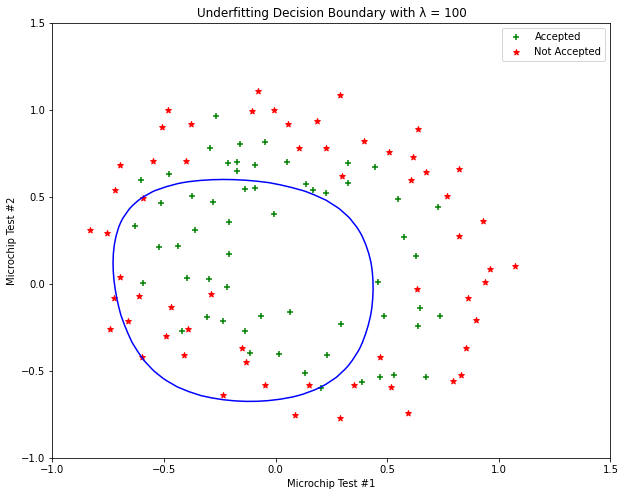

In [ ]:
plt.figure (figsize = (10, 8))
plt.scatter (df_accepted.iloc [:, 0], df_accepted.iloc [:, 1], c = 'g',marker = '+',  label = 'Accepted')
plt.scatter (df_notaccepted.iloc [:, 0], df_notaccepted.iloc [:, 1], c = 'r',marker = '*', label = 'Not Accepted')

xy, yx = np.meshgrid (u, v)
CS = plt.contour (xy, yx, z.T, levels = [0], colors = 'b')
plt.title ('Underfitting Decision Boundary with λ = 100')
plt.xlabel ('Microchip Test #1')
plt.ylabel ('Microchip Test #2')
plt.legend ()
plt.show ()

In [ ]:
# Evaluate accuracy rate with lambda = 100
p = predict (theta_opt, x_poly)
print ('Accuracy:', (np.mean (p == y) *100).round(2), '%')


Accuracy: 61.02 %


Conclusion: The higher lambda is, the lower accuracy is!

# Question: What level of lambda (λ) would bring Cost value to the lowest?

Here, I will find lambda with the lowest cost value in range (0, 1, step = 0.001)

In [ ]:
lambda_list = np.arange (0, 1, 0.001)
costs = []
accuracy = []
initial_theta = np.zeros (n)

for lambda_ in lambda_list:
    theta, nfeval, rc = opt.fmin_tnc(func = cost_function, fprime = gradient_function, x0 = initial_theta, args = (x_poly, y, lambda_))
    cost = cost_function (theta, x_poly, y, lambda_).round (4)
    costs.append (cost)
    p = predict (theta, x_poly)
    acc = (np.mean (p == y) * 100)
    accuracy.append (acc)

df2 = pd.DataFrame (list(zip (lambda_list, costs, accuracy)), columns= ['lambda', 'cost_value', 'accuracy'], index = None )


In [ ]:
# Filter to sort highest accuracy by lambda

df2.sort_values (by= 'cost_value', ascending= False)

,lambda,cost_value,accuracy
999,0.999,0.5289,83.050847
998,0.998,0.5289,83.050847
997,0.997,0.5288,83.050847
996,0.996,0.5287,83.050847
995,0.995,0.5287,83.050847
...,...,...,...
4,0.004,0.3199,83.898305
3,0.003,0.3166,83.898305
2,0.002,0.3121,84.745763
1,0.001,0.3052,85.593220


Lambda = 0.999 are good ones.

In [ ]:
# Find optimal theta corresponding with lambda = 0.066
theta_opt, cost_opt = find_optimal (x_poly, y, lambda_ = 0.999)
print ('Optimal cost =', cost_opt.round (4))
print ('Optimal theta =', theta_opt)

Optimal cost = 0.5289
Optimal theta = [ 1.27329079  0.6257647   1.18178173 -2.02083742 -0.91813956 -1.43254118
  0.12411793 -0.36578392 -0.3574636  -0.17518137 -1.45886952 -0.05097936
 -0.61594663 -0.27492855 -1.19330226 -0.24224451 -0.20615821 -0.0446338
 -0.27797097 -0.29561647 -0.4565308  -1.04369583  0.02784398 -0.29260271
  0.01558761 -0.32761746 -0.14403496 -0.92500753]


In [ ]:
# Find z to plot contour
z = find_z (theta_opt)

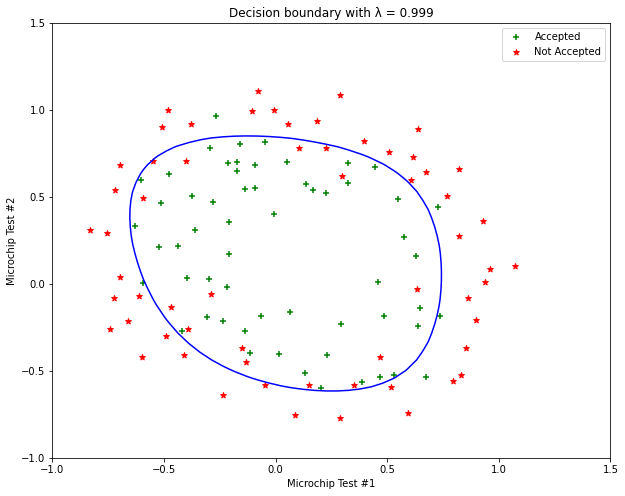

In [ ]:
# Plot graph with lambda = 0.066
plt.figure (figsize = (10, 8))
plt.scatter (df_accepted.iloc [:, 0], df_accepted.iloc [:, 1], c = 'g',marker = '+',  label = 'Accepted')
plt.scatter (df_notaccepted.iloc [:, 0], df_notaccepted.iloc [:, 1], c = 'r',marker = '*', label = 'Not Accepted')

xy, yx = np.meshgrid (u, v)
CS = plt.contour (xy, yx, z.T, levels = [0], colors = 'b')
plt.title ('Decision boundary with λ = 0.999')
plt.xlabel ('Microchip Test #1')
plt.ylabel ('Microchip Test #2')
plt.legend ()
plt.show ()

In [ ]:
pf = PolynomialFeatures (degree= 6, include_bias = True)
X = np.array([-0.25, 1]).reshape (1, -1)

# Adding polynomial features
X = pf.fit_transform (X)
predict (theta_opt, X)

array([0])